# **FINAL Analisis Predictivo**
-  Juan Ignacio Scorza
- link a la base de datos: https://www.kaggle.com/datasets/whenamancodes/predict-diabities





## Cargar Dataset


In [55]:
import pandas as pd
import numpy as np

# Establecer el número máximo de filas y columnas a mostrar
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [56]:

from google.colab import drive

import pandas as pd


drive.mount('/content/drive', force_remount=True)


ruta_archivo = '/content/drive/MyDrive/dataNhanes/ScorzaNhanesReady.csv'
df = pd.read_csv(ruta_archivo)


Mounted at /content/drive


## EDA



### Observaciones de la base

renombrar columnas

In [58]:
df.rename(columns={
    'SEQN': 'seqn',
    'RIDAGEYR': 'age',
    'RIDRETH3': 'race_ethnicity',
    'RIAGENDR': 'gender',
    'DMDEDUC3': 'education_child',
    'DMDEDUC2': 'education_adult',
    'INDHHIN2': 'household_income',
    'DMDBORN4': 'country_birth',
    'DRQSPREP': 'sodium_prep',
    'DR1STY': 'sodium_table',
    'DR1_320Z': 'water_intake',
    'DR1TALCO': 'alcohol_intake',
    'DR1TKCAL': 'energy_intake',
    'DR2TKCAL': 'energy_intake_dr2',
    'DR2TSUGR': 'sugar_intake',
    'DR2STY': 'sodium_table_dr2',
    'DR2TALCO': 'alcohol_intake_dr2',
    'DR2_320Z': 'water_intake_dr2',
    'BMXWT': 'weight',
    'BPXSY1': 'systolic_bp',
    'BPXDI1': 'diastolic_bp',
    'DXDTOPF': 'total_percent_fat',
    'HIQ011': 'health_insurance',
    'IND235': 'monthly_income',
    'ALQ111': 'alcohol_ever',
    'ALQ121': 'alcohol_past_12mo'
}, inplace=True)

In [59]:
df.head()

,seqn,age,race_ethnicity,gender,education_child,education_adult,household_income,country_birth,energy_intake,DR1DRSTZ,sodium_prep,sodium_table,water_intake,alcohol_intake,energy_intake_dr2,sugar_intake,sodium_table_dr2,alcohol_intake_dr2,water_intake_dr2,weight,systolic_bp,diastolic_bp,total_percent_fat,health_insurance,monthly_income,alcohol_ever,alcohol_past_12mo
0,93703.0,2,Non-Hispanic Asian,Female,NaN,NaN,15.0,US,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.7,NaN,NaN,NaN,Yes,12.0,NaN,NaN
1,93704.0,2,Non-Hispanic White,Male,NaN,NaN,15.0,US,1230.0,1,Rarely,No,240.0,0.0,1356.0,134.37,No,0.0,0.0,13.9,NaN,NaN,NaN,Yes,12.0,NaN,NaN
2,93705.0,66,Non-Hispanic Black,Female,NaN,2.0,3.0,US,1202.0,1,Occasionally,No,315.0,0.0,1235.0,43.04,No,0.0,960.0,79.5,NaN,NaN,NaN,Yes,2.0,Yes,Once a month
3,93706.0,18,Non-Hispanic Asian,Male,15.0,NaN,NaN,US,1987.0,1,Occasionally,No,3042.0,0.0,NaN,NaN,NaN,NaN,NaN,66.3,112.0,74.0,22.7,Yes,NaN,No,NaN
4,93707.0,13,Other Race - Including Multi-Racial,Male,6.0,NaN,10.0,US,1775.0,1,Rarely,No,1785.0,0.0,1794.0,85.81,Yes,0.0,1020.0,45.4,128.0,38.0,19.0,Yes,11.0,NaN,NaN


gender lo pasamos a numeros

In [60]:
# Mapear los valores de gender a 1 para Male y 0 para Female
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})


ver var num y cat

In [61]:
# Obtener las columnas numéricas
variables_numericas = df.select_dtypes(include='number').columns.tolist()

# Obtener las columnas categóricas
variables_categoricas = df.select_dtypes(include='object').columns.tolist()

# Imprimir la lista de variables numéricas
print("Variables numéricas:")
print(variables_numericas)

# Imprimir la lista de variables categóricas
print("\nVariables categóricas:")
print(variables_categoricas)


Variables numéricas:
['seqn', 'age', 'gender', 'education_child', 'education_adult', 'household_income', 'energy_intake', 'DR1DRSTZ', 'water_intake', 'alcohol_intake', 'energy_intake_dr2', 'sugar_intake', 'alcohol_intake_dr2', 'water_intake_dr2', 'weight', 'systolic_bp', 'diastolic_bp', 'total_percent_fat', 'monthly_income']

Variables categóricas:
['race_ethnicity', 'country_birth', 'sodium_prep', 'sodium_table', 'sodium_table_dr2', 'health_insurance', 'alcohol_ever', 'alcohol_past_12mo']


### nulls


Se eliminan las filas sin data sobre la bp y la dieta.

In [62]:
# Eliminar filas con valores nulos en las variables de presión arterial
df_cleaned = df.dropna(subset=['systolic_bp', 'diastolic_bp', 'energy_intake_dr2'])

# Verificar el nuevo tamaño del DataFrame
print("Tamaño original del DataFrame:", df.shape)
print("Tamaño del DataFrame limpio:", df_cleaned.shape)


Tamaño original del DataFrame: (8704, 27)
Tamaño del DataFrame limpio: (4983, 27)


In [63]:
df = df_cleaned

observamos nulls

In [64]:
# Contar los valores nulos por columna
null_counts = df.isnull().sum()

# Mostrar los resultados
print(null_counts)


seqn                     0
age                      0
race_ethnicity           0
gender                   0
education_child       3735
education_adult       1249
household_income       179
country_birth            0
energy_intake            0
DR1DRSTZ                 0
sodium_prep              0
sodium_table             0
water_intake             0
alcohol_intake           0
energy_intake_dr2        0
sugar_intake             0
sodium_table_dr2         0
alcohol_intake_dr2       0
water_intake_dr2         0
weight                  33
systolic_bp              0
diastolic_bp             0
total_percent_fat     2277
health_insurance         0
monthly_income         244
alcohol_ever          1155
alcohol_past_12mo     1551
dtype: int64


se crea la variable education_gral ya que education_child y education_adult son complementarias.

dejamos con 0 los NA de education_adult y education_child

In [65]:
# Crear una nueva variable "education_gral" basada en "education_adult" y "education_child"
df['education_gral'] = df['education_adult'].fillna(df['education_child'])




<ipython-input-65-ed80d5aa9c69>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['education_gral'] = df['education_adult'].fillna(df['education_child'])


In [66]:
df['education_child'] = df['education_child'].fillna(0)
df['education_adult'] = df['education_adult'].fillna(0)
df['education_gral'] = df['education_gral'].fillna(0)

<ipython-input-66-895207e71b09>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['education_child'] = df['education_child'].fillna(0)
<ipython-input-66-895207e71b09>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['education_adult'] = df['education_adult'].fillna(0)
<ipython-input-66-895207e71b09>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

#### household income

In [67]:
df['household_income']

4       10.0
8       15.0
9        4.0
10       6.0
12       8.0
        ... 
8695     8.0
8699     4.0
8701    10.0
8702     9.0
8703     7.0
Name: household_income, Length: 4983, dtype: float64

77 y 99 son refused y dont know por lo que los cambiamos por NA e imputamos los NA por la media

In [68]:
import numpy as np

# Reemplazar los valores 77 y 99 por NaN (valores nulos)
df['household_income'] = df['household_income'].replace([77, 99], np.nan)



<ipython-input-68-3d51d8ba40c1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['household_income'] = df['household_income'].replace([77, 99], np.nan)


In [69]:
# Calcular la media de household_income
mean_income = df['household_income'].mean()

# Imputar los valores faltantes con la media
df['household_income'] = df['household_income'].fillna(mean_income)


<ipython-input-69-5de2cf1c7215>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['household_income'] = df['household_income'].fillna(mean_income)


#### weight

imputamos por la media por cada edad

In [70]:
# Calcular la media de peso por cada edad
mean_weight_by_age = df.groupby('age')['weight'].mean()

# Función para imputar valores faltantes en weight por la media de su misma edad
def impute_weight(row):
    if pd.isnull(row['weight']):
        return mean_weight_by_age[row['age']]
    return row['weight']

# Aplicar la función a la columna 'weight'
df['weight'] = df.apply(impute_weight, axis=1)


<ipython-input-70-8809933a2f33>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['weight'] = df.apply(impute_weight, axis=1)


#### total_percent_fat

imputamos con una regresion lineal considerando variables relacionadas como el peso, el genero, las calorias consumidas, el azucar consumido, la edad

In [71]:
from sklearn.linear_model import LinearRegression

# Crear un DataFrame auxiliar con las variables relacionadas
df_aux = df[['total_percent_fat', 'sugar_intake', 'weight', 'age', 'gender', 'systolic_bp', 'energy_intake']]

# Dividir los datos en dos conjuntos: datos con valores existentes y datos con valores faltantes en total_percent_fat
known_data = df_aux[df_aux['total_percent_fat'].notnull()]
unknown_data = df_aux[df_aux['total_percent_fat'].isnull()]

# Separar las variables independientes (X) y la variable dependiente (y) en los datos conocidos
X_known = known_data[['sugar_intake', 'weight', 'age', 'gender', 'systolic_bp', 'energy_intake']]
y_known = known_data['total_percent_fat']

# Crear un modelo de regresión lineal
regression_model = LinearRegression()

# Ajustar el modelo con los datos conocidos
regression_model.fit(X_known, y_known)

# Utilizar el modelo para predecir los valores faltantes en total_percent_fat
imputed_values = regression_model.predict(unknown_data[['sugar_intake', 'weight', 'age', 'gender', 'systolic_bp', 'energy_intake']])

# Imputar los valores faltantes en total_percent_fat en el DataFrame original
df.loc[df['total_percent_fat'].isnull(), 'total_percent_fat'] = imputed_values


#### monthly income

77 y 99 son refused y dont know por lo que los cambiamos por NA e imputamos los NA por la media

In [72]:
import numpy as np

# Reemplazar los valores 77 y 99 por NaN (valores nulos)
df['monthly_income'] = df['monthly_income'].replace([77, 99], np.nan)



<ipython-input-72-ea872cfaebf3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['monthly_income'] = df['monthly_income'].replace([77, 99], np.nan)


In [73]:
# Calcular la media de household_income
mean_income = df['monthly_income'].mean()

# Imputar los valores faltantes con la media
df['monthly_income'] = df['monthly_income'].fillna(mean_income)


<ipython-input-73-7249bd8cbd8c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['monthly_income'] = df['monthly_income'].fillna(mean_income)


#### alcohol

se remplazan por 0

In [74]:
# Lista de variables relacionadas con alcohol
variables_alcohol = ['alcohol_intake', 'alcohol_intake_dr2', 'alcohol_ever', 'alcohol_past_12mo']

# Reemplazar los valores faltantes por 0 en las variables relacionadas con alcohol
df[variables_alcohol] = df[variables_alcohol].fillna(0)


<ipython-input-74-34b622f63350>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[variables_alcohol] = df[variables_alcohol].fillna(0)


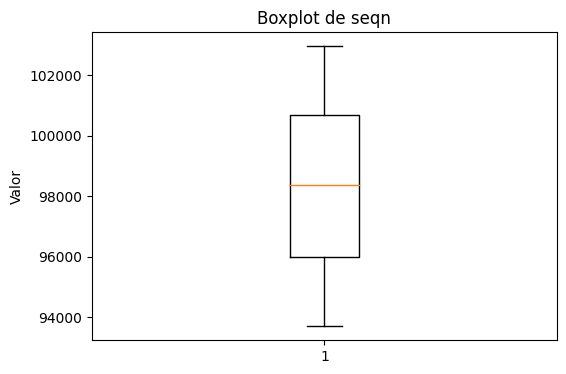

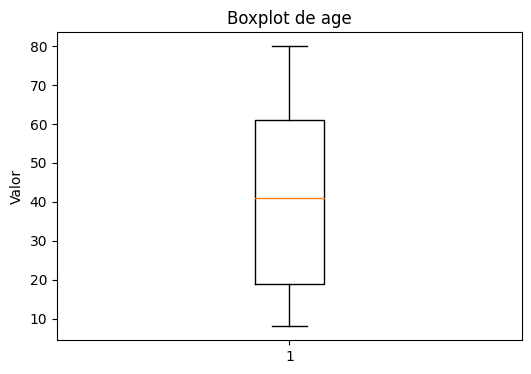

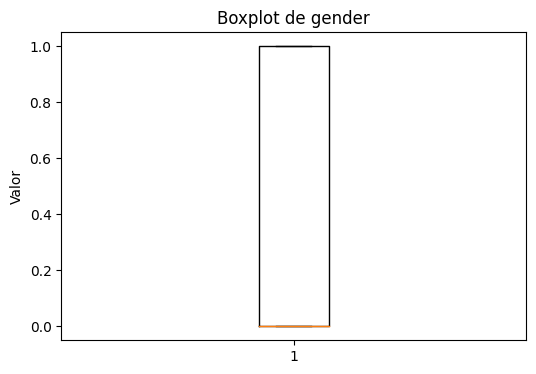

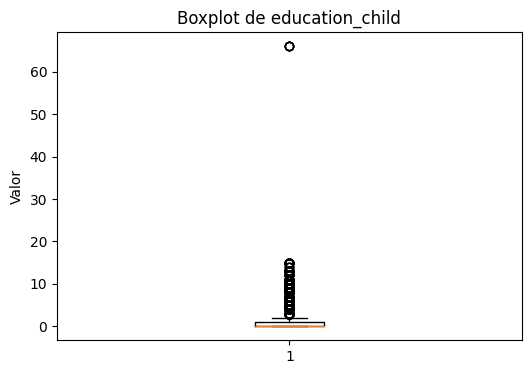

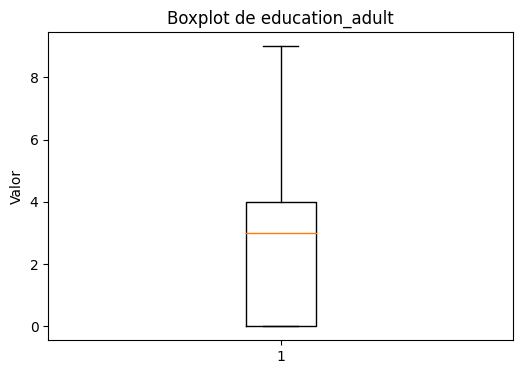

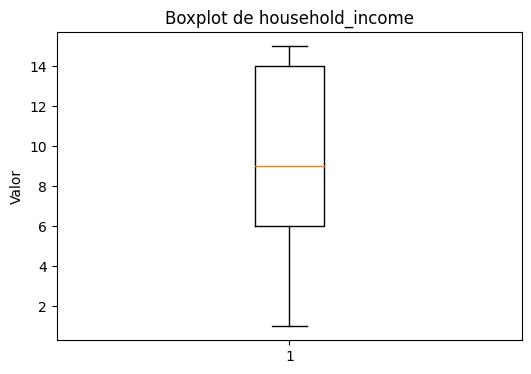

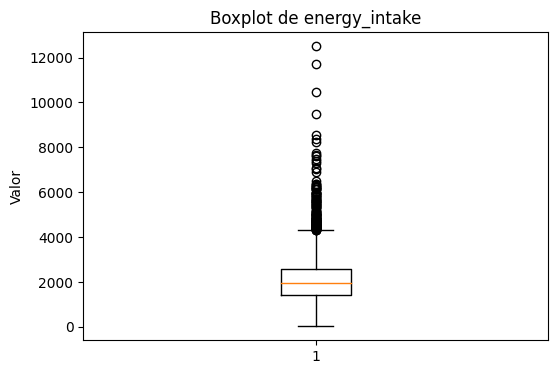

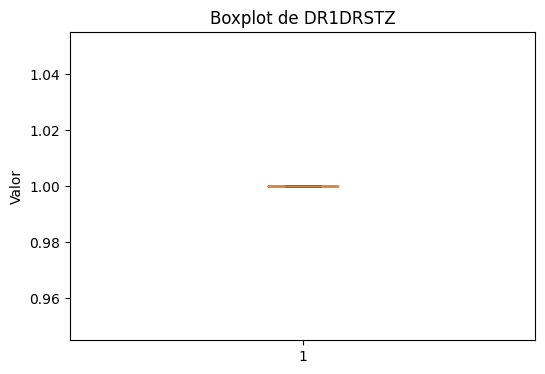

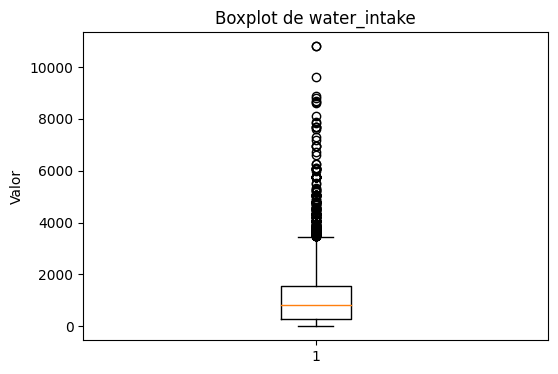

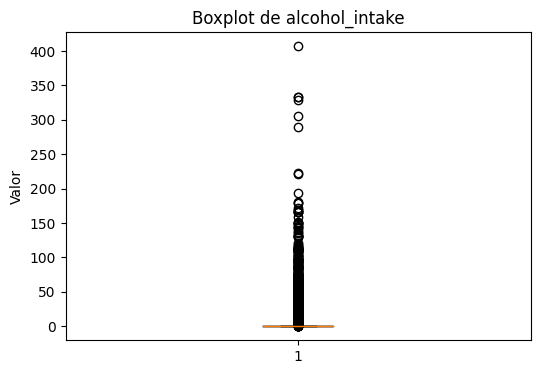

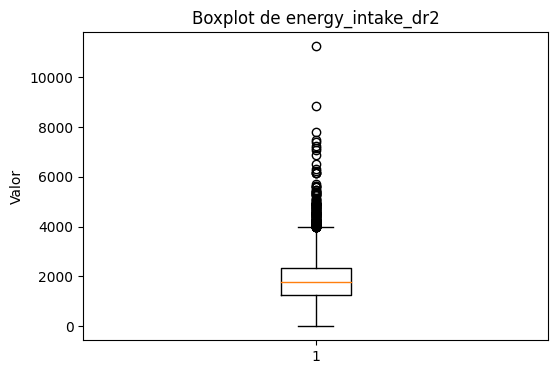

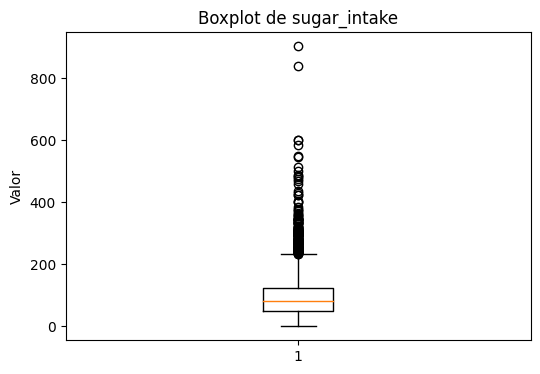

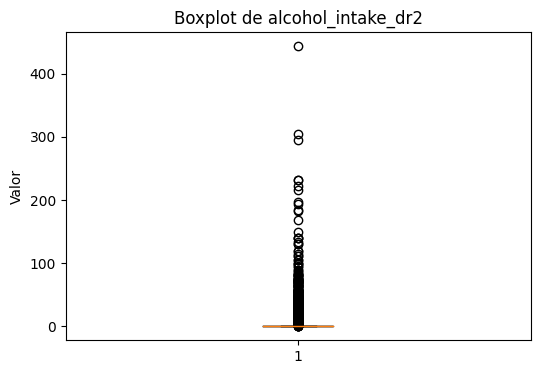

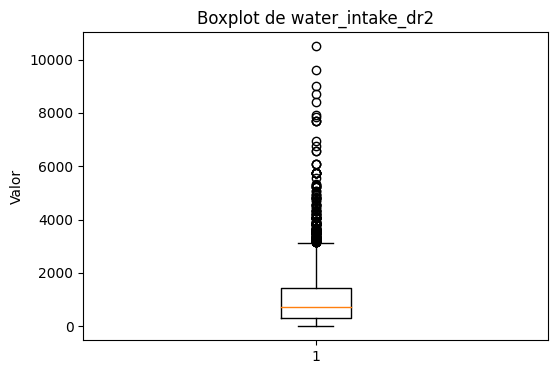

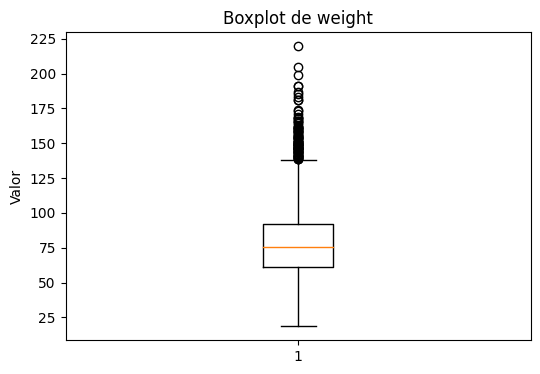

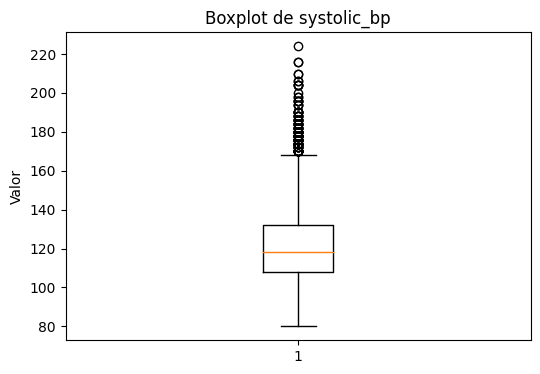

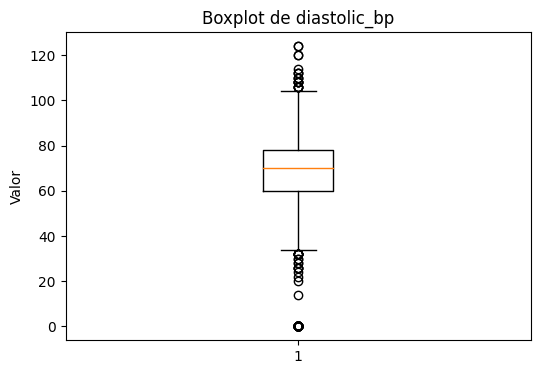

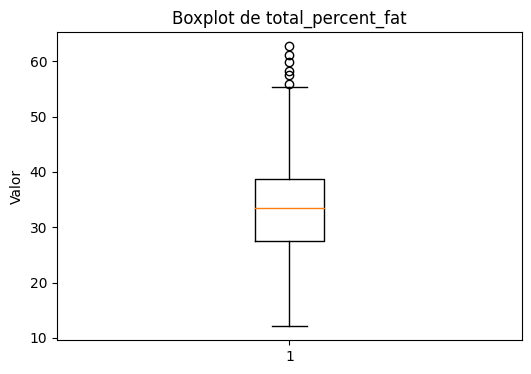

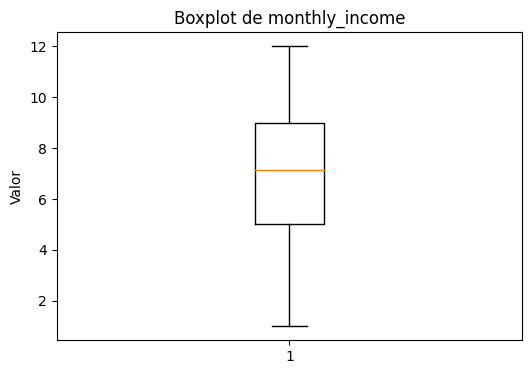

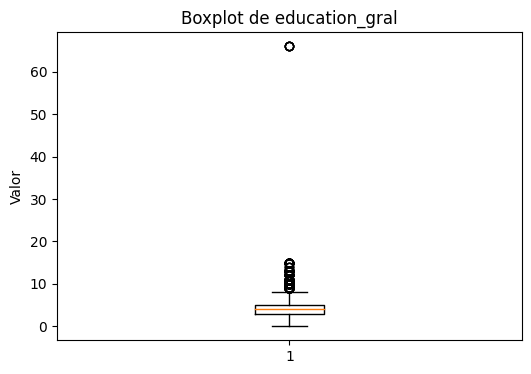

In [75]:
import matplotlib.pyplot as plt

# Filtrar solo las columnas numéricas
numeric_columns = df.select_dtypes(include=['float64', 'int64'])



# Generar boxplots separados para cada columna numérica
for column in numeric_columns:
    plt.figure(figsize=(6, 4))
    plt.boxplot(numeric_columns[column].dropna())
    plt.title(f"Boxplot de {column}")
    plt.ylabel("Valor")
    plt.show()


In [76]:
# Contar filas con systolic_bp > 135
num_rows_above_135 = len(df[df['systolic_bp'] > 135])

# Contar filas con systolic_bp < 135
num_rows_below_135 = len(df[df['systolic_bp'] < 135])

# Imprimir los resultados
print("Número de filas con systolic_bp > 135:", num_rows_above_135)
print("Número de filas con systolic_bp < 135:", num_rows_below_135)


Número de filas con systolic_bp > 135: 1045
Número de filas con systolic_bp < 135: 3938


CREAMOS LA VARIABLE TARGET BINARIA

In [77]:
# Crear la variable binaria high_systolic_bp
df['high_systolic_bp'] = (df['systolic_bp'] > 135).astype(int)

# Imprimir los primeros registros para verificar los resultados
print(df[['systolic_bp', 'high_systolic_bp']].head(30))


    systolic_bp  high_systolic_bp
4         128.0                 0
8         108.0                 0
9         112.0                 0
10        104.0                 0
12        112.0                 0
13        120.0                 0
14        116.0                 0
16        102.0                 0
18        132.0                 0
19        116.0                 0
20        124.0                 0
23        140.0                 1
25        122.0                 0
26        130.0                 0
28        114.0                 0
29        132.0                 0
30        104.0                 0
31        154.0                 1
32        108.0                 0
34        120.0                 0
36        178.0                 1
38        166.0                 1
39        152.0                 1
42        106.0                 0
43        106.0                 0
47        126.0                 0
48        120.0                 0
50        106.0                 0
51        160.

<ipython-input-77-4c0a0b0050f5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['high_systolic_bp'] = (df['systolic_bp'] > 135).astype(int)


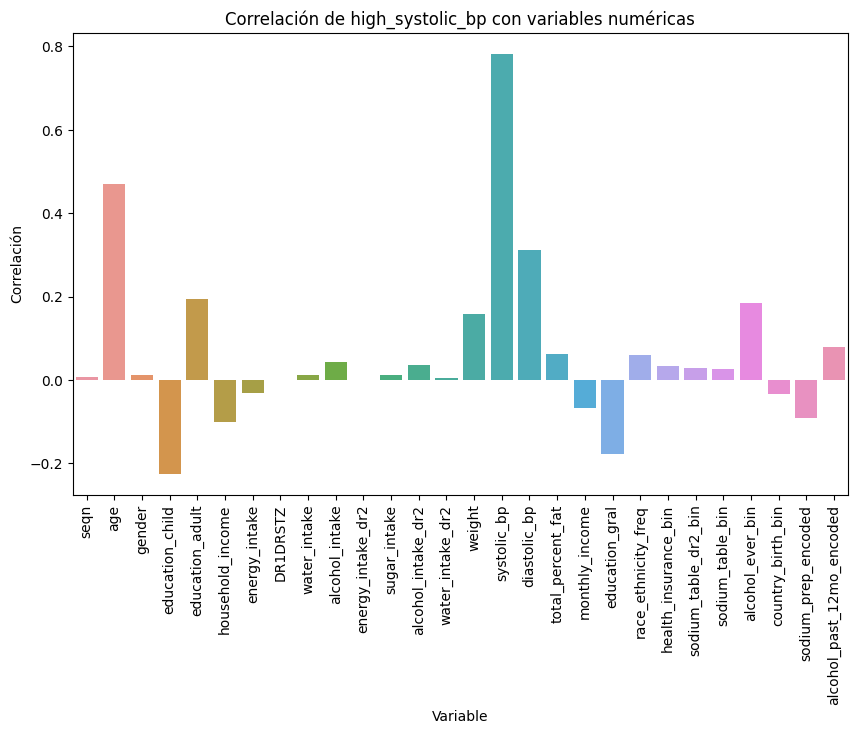

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener las columnas numéricas
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calcular las correlaciones con 'high_systolic_bp'
correlations = df[numeric_columns].corr()['high_systolic_bp'].drop('high_systolic_bp')

# Crear un gráfico de barras de las correlaciones
plt.figure(figsize=(10, 6))
sns.barplot(x=correlations.index, y=correlations.values)
plt.xticks(rotation=90)
plt.xlabel('Variable')
plt.ylabel('Correlación')
plt.title('Correlación de high_systolic_bp con variables numéricas')
plt.show()



### encoding



```
# Variables categóricas:
['race_ethnicity', 'country_birth', 'sodium_prep', 'sodium_table', 'sodium_table_dr2', 'health_insurance', 'alcohol_ever', 'alcohol_past_12mo']
```



In [78]:
# Obtener las columnas categóricas
variables_categoricas = df.select_dtypes(include='object').columns.tolist()

# Iterar sobre las variables categóricas
for variable in variables_categoricas:
    print("Variable:", variable)
    print(df[variable].value_counts())
    print("\n")


Variable: race_ethnicity
 Non-Hispanic White                    1743
 Non-Hispanic Black                    1216
 Mexican American                       696
 Non-Hispanic Asian                     586
 Other Hispanic                         422
Other Race - Including Multi-Racial     320
Name: race_ethnicity, dtype: int64


Variable: country_birth
US        3863
Others    1119
99           1
Name: country_birth, dtype: int64


Variable: sodium_prep
Very Often      1961
Occasionally    1698
Rarely           873
Never            392
Dont Know         59
Name: sodium_prep, dtype: int64


Variable: sodium_table
No           4095
Yes           886
Dont Know       2
Name: sodium_table, dtype: int64


Variable: sodium_table_dr2
No           4086
Yes           895
Dont Know       2
Name: sodium_table_dr2, dtype: int64


Variable: health_insurance
Yes          4348
No            623
Dont Know       9
Refuse          3
Name: health_insurance, dtype: int64


Variable: alcohol_ever
Yes    3432
0  

#### frequency encoding para race_ethnicity

In [79]:
# Variables a codificar
variables_codificar = ['race_ethnicity']

# Iterar sobre las variables a codificar
for variable in variables_codificar:
    # Obtener la frecuencia de cada valor en la variable
    frecuencias = df[variable].value_counts(normalize=True)

    # Generar el nombre de la nueva variable
    nueva_variable = variable + '_freq'

    # Mapear los valores utilizando las frecuencias
    df[nueva_variable] = df[variable].map(frecuencias)


<ipython-input-79-1924a5346170>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[nueva_variable] = df[variable].map(frecuencias)


#### **encoding binario** para alcohol_ever ///   health_insurance ///sodium_table_dr2/// sodium_table ///country_birth

In [80]:
# Variables a codificar
variables_codificar = ['health_insurance', 'sodium_table_dr2', 'sodium_table', 'alcohol_ever']

# Iterar sobre las variables a codificar
for variable in variables_codificar:
    # Generar el nombre de la nueva variable binaria
    nueva_variable = variable + '_bin'

    # Mapear los valores utilizando una condición
    df[nueva_variable] = df[variable].apply(lambda x: 1 if x == 'Yes' else 0)


<ipython-input-80-ad7d4ea39833>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[nueva_variable] = df[variable].apply(lambda x: 1 if x == 'Yes' else 0)
<ipython-input-80-ad7d4ea39833>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[nueva_variable] = df[variable].apply(lambda x: 1 if x == 'Yes' else 0)
<ipython-input-80-ad7d4ea39833>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

In [81]:
# Variable a codificar
variable_codificar = 'country_birth'

# Generar el nombre de la nueva variable binaria
nueva_variable = variable_codificar + '_bin'

# Mapear los valores utilizando una condición
df[nueva_variable] = df[variable_codificar].apply(lambda x: 1 if x == 'US' else 0)


<ipython-input-81-ded41417a6fe>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[nueva_variable] = df[variable_codificar].apply(lambda x: 1 if x == 'US' else 0)


#### **Ordinal encoding** para alcohol_past_12mo y sodium prep

In [82]:
# Diccionario de codificación ordinal
diccionario_codificacion = {
    'Very Often': 3,
    'Occasionally': 2,
    'Rarely': 1,
    'Never': 0,
    'Dont Know': 0.5
}

# Realizar el ordinal encoding
df['sodium_prep_encoded'] = df['sodium_prep'].map(diccionario_codificacion)


<ipython-input-82-98cecdc9cbd0>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sodium_prep_encoded'] = df['sodium_prep'].map(diccionario_codificacion)


In [83]:
df['alcohol_past_12mo'].unique()


array([0, 'Once a week', 'Never in the last year', '2 to 3 times a month',
       'Once a month', 'Every day', 'Nearly every day',
       '3 to 6 times in the last year', '2 times a week',
       'Every dayNever in the last year',
       '7 to 11 times in the last year',
       '3 to 2 times a week times a week', 'Once a monthOnce a month'],
      dtype=object)

In [84]:
# Valores posibles y su orden
valores_orden = {
    'Never in the last year': 0,
    '2 to 3 times a month': 5,
    'Every dayNever in the last year':1,
    '3 to 6 times in the last year': 2,
    'Once a week': 6,
    'Once a month': 4,
    '2 times a week':7,
    '7 to 11 times in the last year': 3,
    '3 to 2 times a week times a week': 8,
    'Nearly every day': 9,
    'Every day': 10,
    'Once a monthOnce a month': 0,
    0:0
}

# Realizar el encoding ordinal
df['alcohol_past_12mo_encoded'] = df['alcohol_past_12mo'].map(valores_orden)


<ipython-input-84-4ae3e423affb>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['alcohol_past_12mo_encoded'] = df['alcohol_past_12mo'].map(valores_orden)


## Modelos 1. para systolic_bp

PARTICION

In [ ]:
from sklearn.model_selection import train_test_split

model_num_columns = df.select_dtypes(include=['float64', 'int64']).columns.to_list()
model_num_columns.remove('diastolic_bp')
model_num_columns.remove('systolic_bp')

X = df[model_num_columns]
Y = df['systolic_bp']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 1704)

In [ ]:
print('data Entrenamiento: ', X_train.shape)
print('data Testeo: ', X_test.shape)

data Entrenamiento:  (3986, 26)
data Testeo:  (997, 26)


### Modelos sueltos

---



In [ ]:
!pip install scikit-optimize
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, explained_variance_score, r2_score

In [ ]:

# Definir los modelos a utilizar
models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree', DecisionTreeRegressor()),
    ('Random Forest', RandomForestRegressor()),
    ('Gradient Boosting', GradientBoostingRegressor()),

    ('Support Vector Machine', SVR())
]

# Entrenar Y evaluar los modelos
for name, model in models:
    # Entrenar el modelo
    model.fit(X_train, Y_train)

    # Realizar predicciones en el conjunto de prueba
    Y_pred = model.predict(X_test)

    # Calcular las métricas
    r2 = r2_score(Y_test, Y_pred)
    mse = mean_squared_error(Y_test, Y_pred)
    evs = explained_variance_score(Y_test, Y_pred)

    # Imprimir las métricas
    print(f"Modelo: {name}")
    print(f"R2: {r2}")
    print(f"Mean Squared Error: {mse}")
    print(f"Explained Variance Score: {evs}")
    print("-------------------------------------")


Modelo: Linear Regression
R2: 0.37826784971192406
Mean Squared Error: 243.2060147342241
Explained Variance Score: 0.37838974086744703
-------------------------------------
Modelo: Decision Tree
R2: -0.15030362158839772
Mean Squared Error: 449.9699097291876
Explained Variance Score: -0.14897779236827846
-------------------------------------
Modelo: Random Forest
R2: 0.4037941426866747
Mean Squared Error: 233.22076950852554
Explained Variance Score: 0.4039913610469542
-------------------------------------
Modelo: Gradient Boosting
R2: 0.42476798827399664
Mean Squared Error: 225.01632745646165
Explained Variance Score: 0.42482019164158935
-------------------------------------
Modelo: Support Vector Machine
R2: -0.03290311849742711
Mean Squared Error: 404.04577910264965
Explained Variance Score: 0.0001190266403668927
-------------------------------------


### Random Forest

#### ajuste grid

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Definir el modelo de Random Forest Regressor
model = RandomForestRegressor(random_state=1704)

# Definir los hiperparámetros a ajustar mediante GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Realizar la búsqueda de hiperparámetros mediante GridSearchCV
grid_search = GridSearchCV(model, param_grid, scoring='r2', cv=5)
grid_search.fit(X_train, Y_train)

# Obtener los mejores hiperparámetros y el mejor modelo
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:")
for param, value in best_params.items():
    print(f"{param}: {value}")

# Evaluar el mejor modelo en el conjunto de prueba
r2_score = best_model.score(X_test, Y_test)
print("R2 score del mejor modelo en el conjunto de prueba:", r2_score)


Mejores hiperparámetros:
max_depth: 5
min_samples_leaf: 4
min_samples_split: 10
n_estimators: 300
R2 score del mejor modelo en el conjunto de prueba: 0.4085192955692851



Mejores hiperparámetros:
max_depth: 5
min_samples_leaf: 4
min_samples_split: 10
n_estimators: 300
R2 score del mejor modelo en el conjunto de prueba: 0.4085192955692851


####  ajuste bayes





In [ ]:
from skopt import BayesSearchCV
from sklearn.ensemble import RandomForestRegressor

# Definir el espacio de búsqueda para los hiperparámetros
param_space = {
    'n_estimators': (100, 300),
    'max_depth': (1, 15),
    'min_samples_split': (2, 10),
    'min_samples_leaf': (1, 4),
}

# Crear el modelo de Regresión de Bosque Aleatorio
rf_model = RandomForestRegressor(random_state=1704)

# Crear el objeto BayesSearchCV para la búsqueda bayesiana
bayes_search = BayesSearchCV(estimator=rf_model, search_spaces=param_space, scoring='r2', cv=5)

# Ajustar el modelo utilizando la partición de entrenamiento
bayes_search.fit(X_train, Y_train)

# Obtener el mejor modelo y los mejores hiperparámetros
best_rf_model = bayes_search.best_estimator_
best_params = bayes_search.best_params_

# Imprimir los mejores hiperparámetros
print("Mejores hiperparámetros:")
print(best_params)

# Evaluar el modelo en el conjunto de prueba
r2_score_test = best_rf_model.score(X_test, Y_test)

# Imprimir el R2 en el conjunto de prueba
print("R2 en el conjunto de prueba:", r2_score_test)


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Mejores hiperparámetros:
OrderedDict([('max_depth', 6), ('min_samples_leaf', 4), ('min_samples_split', 10), ('n_estimators', 198)])
R2 en el conjunto de prueba: 0.41185114383294497


### CatBoost Regressor

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 9.4 MB/s eta 0:00:00


#### ajuste bayes

In [ ]:
from skopt import BayesSearchCV
from catboost import CatBoostRegressor

# Definir el espacio de búsqueda para los hiperparámetros
param_space = {
    'iterations': (100, 1000),
    'learning_rate': (0.01, 0.1),
    'depth': (1, 10),
    'l2_leaf_reg': (1, 10),
}

# Crear el modelo de CatBoost Regressor
catboost_model = CatBoostRegressor(random_state=1704, verbose=0)

# Crear el objeto BayesSearchCV para la búsqueda bayesiana
bayes_search = BayesSearchCV(estimator=catboost_model, search_spaces=param_space, scoring='r2', cv=5)

# Ajustar el modelo utilizando la partición de entrenamiento
bayes_search.fit(X_train, Y_train)

# Obtener el mejor modelo y los mejores hiperparámetros
best_catboost_model = bayes_search.best_estimator_
best_params = bayes_search.best_params_

# Imprimir los mejores hiperparámetros
print("Mejores hiperparámetros:")
print(best_params)

# Evaluar el modelo en el conjunto de prueba
r2_score_test = best_catboost_model.score(X_test, Y_test)

# Imprimir el R2 en el conjunto de prueba
print("R2 en el conjunto de prueba:", r2_score_test)


Mejores hiperparámetros:
OrderedDict([('depth', 5), ('iterations', 1000), ('l2_leaf_reg', 10), ('learning_rate', 0.01)])
R2 en el conjunto de prueba: 0.4281167251555317


#### ajuste grid

## Modelos 2. para high_systolic_bp

In [88]:
from sklearn.model_selection import train_test_split

model_num_columns = df.select_dtypes(include=['float64', 'int64']).columns.to_list()
model_num_columns.remove('diastolic_bp')
model_num_columns.remove('systolic_bp')
model_num_columns.remove('high_systolic_bp')

X = df[model_num_columns]
Y = df['high_systolic_bp']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 1704)

In [87]:
model_num_columns

['seqn',
 'age',
 'gender',
 'education_child',
 'education_adult',
 'household_income',
 'energy_intake',
 'DR1DRSTZ',
 'water_intake',
 'alcohol_intake',
 'energy_intake_dr2',
 'sugar_intake',
 'alcohol_intake_dr2',
 'water_intake_dr2',
 'weight',
 'total_percent_fat',
 'monthly_income',
 'education_gral',
 'race_ethnicity_freq',
 'health_insurance_bin',
 'sodium_table_dr2_bin',
 'sodium_table_bin',
 'alcohol_ever_bin',
 'country_birth_bin',
 'sodium_prep_encoded',
 'alcohol_past_12mo_encoded']

In [ ]:
print('data Entrenamiento: ', X_train.shape)
print('data Testeo: ', X_test.shape)

data Entrenamiento:  (3986, 26)
data Testeo:  (997, 26)


### Modelos Sueltos:

In [ ]:
!pip install catboost
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score

# Definir los modelos a utilizar
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR(),
    'CatBoost': CatBoostRegressor(verbose=False),
    'XGBoost': XGBRegressor(),
    'LGBM': LGBMRegressor()
}

# Entrenar y evaluar los modelos
results = {}
for model_name, model in models.items():
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(Y_test, y_pred)
    results[model_name] = r2

# Imprimir los resultados
print("Resultados de los modelos:")
for model_name, r2 in results.items():
    print(f"{model_name}: {r2}")


Resultados de los modelos:
Linear Regression: 0.23264359755572528
Decision Tree: -0.5136386449184442
Random Forest: 0.25685784127979927
SVR: -0.062960456591175
CatBoost: 0.26668952882218355
XGBoost: 0.20259324352762897
LGBM: 0.2447222702900228


### Random Forest

#### ajuste grid

minimizar falsos negativos

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, confusion_matrix

# Definir los hiperparámetros a ajustar
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Definir el modelo y la métrica a optimizar
model = RandomForestClassifier(random_state=1704)
scorer = make_scorer(lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[1, 0], greater_is_better=False)

# Realizar la búsqueda de hiperparámetros
grid_search = GridSearchCV(model, param_grid, scoring=scorer)
grid_search.fit(X_train, Y_train)

# Obtener los mejores hiperparámetros y el modelo ajustado
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluar el modelo en el conjunto de prueba
y_pred = best_model.predict(X_test)
conf_matrix = confusion_matrix(Y_test, y_pred)
false_negatives = conf_matrix[1, 0]

# Imprimir los resultados
print("Mejores hiperparámetros:", best_params)
print("Número de falsos negativos:", false_negatives)
print("Matriz de confusión:")
print(conf_matrix)


Mejores hiperparámetros: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Número de falsos negativos: 144
Matriz de confusión:
[[765  32]
 [144  56]]


buscando maximizar accuracy

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score

# Definir los hiperparámetros a ajustar
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Definir el modelo y la métrica a optimizar
model = RandomForestClassifier(random_state=1704)
scorer = 'accuracy'

# Realizar la búsqueda de hiperparámetros
grid_search = GridSearchCV(model, param_grid, scoring=scorer)
grid_search.fit(X_train, Y_train)

# Obtener los mejores hiperparámetros y el modelo ajustado
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluar el modelo en el conjunto de prueba
y_pred = best_model.predict(X_test)
conf_matrix = confusion_matrix(Y_test, y_pred)
accuracy = accuracy_score(Y_test, y_pred)

# Imprimir los resultados
print("Mejores hiperparámetros:", best_params)
print("Precisión:", accuracy)
print("Matriz de confusión:")
print(conf_matrix)


Mejores hiperparámetros: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Precisión: 0.8254764292878636
Matriz de confusión:
[[767  30]
 [144  56]]


####  ajuste bayes

In [ ]:
!pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 1.9 MB/s eta 0:00:00


priorizando f1 (FN)

In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from skopt import BayesSearchCV

# Definir los hiperparámetros a ajustar
param_space = {
    'n_estimators': (10, 500),
    'max_depth': (1, 20),
    'min_samples_split': (2, 10),
    'min_samples_leaf': (1, 10)
}

# Definir el modelo
model = RandomForestClassifier(random_state=1704)

# Realizar la búsqueda de hiperparámetros
bayes_search = BayesSearchCV(model, param_space, scoring='recall', cv=5)
bayes_search.fit(X_train, Y_train)

# Obtener el modelo ajustado
best_model = bayes_search.best_estimator_

# Evaluar el modelo en el conjunto de prueba
y_pred = best_model.predict(X_test)
conf_matrix = confusion_matrix(Y_test, y_pred)
accuracy = accuracy_score(Y_test, y_pred)

# Imprimir los resultados
print("Matriz de confusión:")
print(conf_matrix)
print("Precisión:", accuracy)
print("best_params: ",bayes_search.best_params_)


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist

Matriz de confusión:
[[740  57]
 [123  77]]
Precisión: 0.8194583751253761
best_params:  OrderedDict([('max_depth', 19), ('min_samples_leaf', 1), ('min_samples_split', 10), ('n_estimators', 10)])


priorizando accuracy

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from skopt import BayesSearchCV

# Definir los hiperparámetros a ajustar
param_space = {
    'n_estimators': (10, 500),
    'max_depth': (1, 20),
    'min_samples_split': (2, 10),
    'min_samples_leaf': (1, 10)
}

# Definir el modelo
model = RandomForestClassifier(random_state=1704)

# Realizar la búsqueda de hiperparámetros
bayes_search = BayesSearchCV(model, param_space, scoring='accuracy', cv=5)
bayes_search.fit(X_train, Y_train)

# Obtener el modelo ajustado
best_model = bayes_search.best_estimator_

# Evaluar el modelo en el conjunto de prueba
y_pred = best_model.predict(X_test)
conf_matrix = confusion_matrix(Y_test, y_pred)
accuracy = accuracy_score(Y_test, y_pred)

# Imprimir los resultados
print("Matriz de confusión:")
print(conf_matrix)
print("Precisión:", accuracy)

Matriz de confusión:
[[776  21]
 [147  53]]
Precisión: 0.831494483450351


### CATBOOST

#### ajuste grid

In [ ]:
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Definir los hiperparámetros a ajustar
param_grid = {
    'iterations': [100, 200, 300],
    'depth': [4, 6, 8],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Crear el clasificador CatBoost
catboost = CatBoostClassifier(loss_function='Logloss', eval_metric='Accuracy', random_seed=1704)

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(catboost, param_grid, scoring='accuracy', cv=5, refit=True)

# Ajustar el modelo con los datos de entrenamiento
grid_search.fit(X_train, Y_train)

# Obtener las predicciones en el conjunto de prueba
y_pred = grid_search.predict(X_test)

# Calcular la matriz de confusión
confusion = confusion_matrix(Y_test, y_pred)

# Calcular la accuracy del modelo
accuracy = accuracy_score(Y_test, y_pred)

# Imprimir la matriz de confusión y la accuracy
print("Matriz de Confusión:")
print(confusion)
print("Accuracy del modelo:", accuracy)


Se truncaron las últimas líneas 5000 del resultado de transmisión.
4:	learn: 0.8181248	total: 60.5ms	remaining: 2.36s
5:	learn: 0.8209470	total: 70.3ms	remaining: 2.27s
6:	learn: 0.8209470	total: 80.5ms	remaining: 2.22s
7:	learn: 0.8231421	total: 90.5ms	remaining: 2.17s
8:	learn: 0.8193791	total: 101ms	remaining: 2.14s
9:	learn: 0.8187520	total: 112ms	remaining: 2.12s
10:	learn: 0.8181248	total: 124ms	remaining: 2.12s
11:	learn: 0.8187520	total: 133ms	remaining: 2.09s
12:	learn: 0.8153026	total: 144ms	remaining: 2.07s
13:	learn: 0.8174976	total: 154ms	remaining: 2.04s
14:	learn: 0.8171841	total: 164ms	remaining: 2.02s
15:	learn: 0.8193791	total: 174ms	remaining: 2s
16:	learn: 0.8171841	total: 185ms	remaining: 1.99s
17:	learn: 0.8162433	total: 195ms	remaining: 1.97s
18:	learn: 0.8149890	total: 205ms	remaining: 1.96s
19:	learn: 0.8149890	total: 224ms	remaining: 2.01s
20:	learn: 0.8149890	total: 238ms	remaining: 2.03s
21:	learn: 0.8143619	total: 248ms	remaining: 2.01s
22:	learn: 0.8171841

#### ajuste metodo bayesiano

mejor accuracy

In [ ]:
from skopt import BayesSearchCV
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

# Definir los hiperparámetros a ajustar
param_grid = {
    'iterations': (100, 1000),
    'depth': (3, 10),
    'learning_rate': (0.01, 0.1, 'log-uniform')
}

# Crear el clasificador CatBoost
catboost = CatBoostClassifier(loss_function='Logloss', eval_metric='Accuracy', random_seed=1704)

# Crear el objeto BayesSearchCV
bayes_search = BayesSearchCV(catboost, param_grid, scoring='accuracy', cv=5, n_jobs=-1, refit=True)

# Ajustar el modelo con los datos de entrenamiento
bayes_search.fit(X_train, Y_train)

# Obtener las predicciones en el conjunto de prueba
y_pred = bayes_search.predict(X_test)

# Calcular la matriz de confusión
confusion = confusion_matrix(Y_test, y_pred)

# Calcular la accuracy del modelo
accuracy = accuracy_score(Y_test, y_pred)

# Imprimir la matriz de confusión y la accuracy
print("Matriz de Confusión:")
print(confusion)
print("Accuracy del modelo:", accuracy)


0:	learn: 0.7885098	total: 11.7ms	remaining: 1.18s
1:	learn: 0.7887607	total: 15.7ms	remaining: 787ms
2:	learn: 0.7900151	total: 19.3ms	remaining: 636ms
3:	learn: 0.7895133	total: 22.4ms	remaining: 550ms
4:	learn: 0.7970396	total: 25.7ms	remaining: 498ms
5:	learn: 0.7970396	total: 28.8ms	remaining: 461ms
6:	learn: 0.7990467	total: 32.1ms	remaining: 435ms
7:	learn: 0.8025590	total: 35.3ms	remaining: 415ms
8:	learn: 0.8048169	total: 38.5ms	remaining: 398ms
9:	learn: 0.8095835	total: 41.8ms	remaining: 385ms
10:	learn: 0.8123432	total: 45ms	remaining: 373ms
11:	learn: 0.8135976	total: 48.2ms	remaining: 361ms
12:	learn: 0.8143502	total: 51.3ms	remaining: 351ms
13:	learn: 0.8118414	total: 54.6ms	remaining: 343ms
14:	learn: 0.8138485	total: 57.7ms	remaining: 335ms
15:	learn: 0.8148520	total: 61.1ms	remaining: 329ms
16:	learn: 0.8171099	total: 64.4ms	remaining: 322ms
17:	learn: 0.8176116	total: 67.6ms	remaining: 315ms
18:	learn: 0.8171099	total: 70.7ms	remaining: 309ms
19:	learn: 0.8166081	tot

minimizar recall

In [91]:
from skopt import BayesSearchCV
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix, recall_score
from sklearn.model_selection import train_test_split

# Definir los hiperparámetros a ajustar
param_grid = {
    'iterations': (100, 1000),
    'depth': (3, 10),
    'learning_rate': (0.01, 0.1, 'log-uniform')
}

# Crear el clasificador CatBoost
catboost = CatBoostClassifier(loss_function='Logloss', eval_metric='Accuracy', random_seed=1704)

# Crear el objeto BayesSearchCV
bayes_search = BayesSearchCV(catboost, param_grid, scoring='recall', cv=5, n_jobs=-1, refit=True)

# Ajustar el modelo con los datos de entrenamiento
bayes_search.fit(X_train, Y_train)

# Obtener las predicciones en el conjunto de prueba
y_pred = bayes_search.predict(X_test)

# Calcular la matriz de confusión
confusion = confusion_matrix(Y_test, y_pred)

# Calcular el recall del modelo
recall = recall_score(Y_test, y_pred)

# Calcular la accuracy del modelo
accuracy = accuracy_score(Y_test, y_pred)

# Imprimir la matriz de confusión y el recall
print("Matriz de Confusión:")
print(confusion)
print("Recall del modelo:", recall)
print("Accuracy del modelo:", accuracy)
print("best_params: ",bayes_search.best_params_)


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist

0:	learn: 0.7880080	total: 5.6ms	remaining: 4.58s
1:	learn: 0.7880080	total: 8.74ms	remaining: 3.56s
2:	learn: 0.7925238	total: 11.1ms	remaining: 3.02s
3:	learn: 0.7920221	total: 13.5ms	remaining: 2.75s
4:	learn: 0.8003011	total: 15.6ms	remaining: 2.54s
5:	learn: 0.7965379	total: 17.7ms	remaining: 2.4s
6:	learn: 0.7970396	total: 20.3ms	remaining: 2.35s
7:	learn: 0.7972905	total: 22.7ms	remaining: 2.29s
8:	learn: 0.8053186	total: 24.9ms	remaining: 2.23s
9:	learn: 0.8070748	total: 27.1ms	remaining: 2.19s
10:	learn: 0.8113397	total: 29.2ms	remaining: 2.14s
11:	learn: 0.8113397	total: 31.3ms	remaining: 2.1s
12:	learn: 0.8108379	total: 33.7ms	remaining: 2.08s
13:	learn: 0.8113397	total: 35.8ms	remaining: 2.06s
14:	learn: 0.8118414	total: 37.9ms	remaining: 2.03s
15:	learn: 0.8123432	total: 40ms	remaining: 2s
16:	learn: 0.8115906	total: 42.1ms	remaining: 1.98s
17:	learn: 0.8113397	total: 44.4ms	remaining: 1.97s
18:	learn: 0.8108379	total: 46.5ms	remaining: 1.95s
19:	learn: 0.8108379	total: 48

recall 0.15

In [ ]:
from skopt import BayesSearchCV
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix, recall_score
from sklearn.model_selection import train_test_split

# Definir los hiperparámetros a ajustar
param_grid = {
    'iterations': (100, 1000),
    'depth': (3, 10),
    'learning_rate': (0.01, 0.1, 'log-uniform')
}

# Crear el clasificador CatBoost
catboost = CatBoostClassifier(loss_function='Logloss', eval_metric='Accuracy', random_seed=1704)

# Crear el objeto BayesSearchCV
bayes_search = BayesSearchCV(catboost, param_grid, scoring='recall', cv=5, n_jobs=-1, refit=True)

# Ajustar el modelo con los datos de entrenamiento
bayes_search.fit(X_train, Y_train)

# Obtener las predicciones en el conjunto de prueba
y_pred = bayes_search.predict(X_test)

# Calcular la matriz de confusión
confusion = confusion_matrix(Y_test, y_pred)

# Calcular el recall del modelo
recall = recall_score(Y_test, y_pred)

# Calcular la accuracy del modelo
accuracy = accuracy_score(Y_test, y_pred)

# Imprimir la matriz de confusión y el recall
print("Matriz de Confusión:")
print(confusion)
print("Recall del modelo:", recall)
print("Accuracy del modelo:", accuracy)

### Extra Trees

#### ajuste grid


accuracy:

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Definir los hiperparámetros a ajustar
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 4, 6]
}

# Crear el clasificador ExtraTrees
extratrees = ExtraTreesClassifier(random_state=1704)

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(extratrees, param_grid, scoring='accuracy', cv=5)

# Ajustar el modelo con los datos de entrenamiento
grid_search.fit(X_train, Y_train)

# Obtener las predicciones en el conjunto de prueba
y_pred = grid_search.predict(X_test)

# Calcular la matriz de confusión
confusion = confusion_matrix(Y_test, y_pred)

# Calcular la precisión del modelo
accuracy = accuracy_score(Y_test, y_pred)

# Imprimir la matriz de confusión y la precisión
print("Matriz de Confusión:")
print(confusion)
print("Precisión del modelo:", accuracy)


Matriz de Confusión:
[[762  35]
 [148  52]]
Precisión del modelo: 0.8164493480441324


recall

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

# Definir los hiperparámetros a ajustar
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3]
}

# Crear el clasificador ExtraTrees
extratrees = ExtraTreesClassifier(random_state=1704)

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(extratrees, param_grid, scoring='recall', cv=5)

# Ajustar el modelo con los datos de entrenamiento
grid_search.fit(X_train, Y_train)

# Obtener las predicciones en el conjunto de prueba
y_pred = grid_search.predict(X_test)

# Calcular la matriz de confusión
confusion = confusion_matrix(Y_test, y_pred)

# Calcular la precisión del modelo
accuracy = accuracy_score(Y_test, y_pred)

# Imprimir la matriz de confusión y la precisión del modelo
print("Matriz de Confusión:")
print(confusion)
print("Precisión del modelo:", accuracy)


Matriz de Confusión:
[[767  30]
 [148  52]]
Precisión del modelo: 0.8214643931795386


####  ajuste bayes

In [90]:
from skopt import BayesSearchCV
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score
from sklearn.model_selection import train_test_split

# Definir los hiperparámetros a ajustar
param_grid = {
    'n_estimators': (100, 1000),
    'max_depth': (3, 10),
    'min_samples_split': (2, 10),
    'min_samples_leaf': (1, 5),
    'max_features': (0.1, 1.0, 'uniform')
}

# Crear el clasificador ExtraTrees
extra_trees = ExtraTreesClassifier(random_state=1704)

# Crear el objeto BayesSearchCV
bayes_search = BayesSearchCV(extra_trees, param_grid, scoring='accuracy', cv=5, n_jobs=-1, refit=True)

# Ajustar el modelo con los datos de entrenamiento
bayes_search.fit(X_train, Y_train)

# Obtener las predicciones en el conjunto de prueba
y_pred = bayes_search.predict(X_test)

# Calcular la matriz de confusión
confusion = confusion_matrix(Y_test, y_pred)

# Calcular la accuracy del modelo
accuracy = accuracy_score(Y_test, y_pred)

# Calcular el recall del modelo
recall = recall_score(Y_test, y_pred)

# Imprimir la matriz de confusión, la accuracy y el recall
print("Matriz de Confusión:")
print(confusion)
print("Accuracy del modelo:", accuracy)
print("Recall del modelo:", recall)
print("best_params: ",bayes_search.best_params_)

Matriz de Confusión:
[[767  30]
 [139  61]]
Accuracy del modelo: 0.8304914744232698
Recall del modelo: 0.305
best_params:  OrderedDict([('max_depth', 10), ('max_features', 0.5101488134278673), ('min_samples_leaf', 1), ('min_samples_split', 10), ('n_estimators', 877)])


recall

In [92]:
from skopt import BayesSearchCV
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score
from sklearn.model_selection import train_test_split

# Definir los hiperparámetros a ajustar
param_grid = {
    'n_estimators': (100, 1000),
    'max_depth': (3, 10),
    'min_samples_split': (2, 10),
    'min_samples_leaf': (1, 5),
    'max_features': (0.1, 1.0, 'uniform')
}

# Crear el clasificador ExtraTrees
extra_trees = ExtraTreesClassifier(random_state=1704)

# Crear el objeto BayesSearchCV
bayes_search = BayesSearchCV(extra_trees, param_grid, scoring='recall', cv=5, n_jobs=-1, refit=True)

# Ajustar el modelo con los datos de entrenamiento
bayes_search.fit(X_train, Y_train)

# Obtener las predicciones en el conjunto de prueba
y_pred = bayes_search.predict(X_test)

# Calcular la matriz de confusión
confusion = confusion_matrix(Y_test, y_pred)

# Calcular la accuracy del modelo
accuracy = accuracy_score(Y_test, y_pred)

# Calcular el recall del modelo
recall = recall_score(Y_test, y_pred)

# Imprimir la matriz de confusión, la accuracy y el recall
print("Matriz de Confusión:")
print(confusion)
print("Accuracy del modelo:", accuracy)
print("Recall del modelo:", recall)
print("best_params: ",bayes_search.best_params_)



/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist

Matriz de Confusión:
[[749  48]
 [125  75]]
Accuracy del modelo: 0.8264794383149449
Recall del modelo: 0.375
best_params:  OrderedDict([('max_depth', 10), ('max_features', 1.0), ('min_samples_leaf', 1), ('min_samples_split', 10), ('n_estimators', 100)])


### XGBOOST

#### ajuste grid

recall

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score
from sklearn.model_selection import train_test_split

# Definir los hiperparámetros a ajustar
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 1, 5]
}

# Crear el clasificador XGBoost
xgb = XGBClassifier(random_state=1704)

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(xgb, param_grid, scoring='recall', cv=5, n_jobs=-1, refit=True)

# Ajustar el modelo con los datos de entrenamiento
grid_search.fit(X_train, Y_train)

# Obtener las predicciones en el conjunto de prueba
y_pred = grid_search.predict(X_test)

# Calcular la matriz de confusión
confusion = confusion_matrix(Y_test, y_pred)

# Calcular la accuracy del modelo
accuracy = accuracy_score(Y_test, y_pred)

# Calcular el recall del modelo
recall = recall_score(Y_test, y_pred)

# Imprimir la matriz de confusión, la accuracy y el recall
print("Matriz de Confusión:")
print(confusion)
print("Accuracy del modelo:", accuracy)
print("Recall del modelo:", recall)


Matriz de Confusión:
[[735  62]
 [126  74]]
Accuracy del modelo: 0.8114343029087262
Recall del modelo: 0.37


### LGBM

#### ajuste bayes

In [93]:
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score
from skopt import BayesSearchCV

# Definir el espacio de búsqueda de hiperparámetros
param_space = {
    'n_estimators': (100, 500),
    'max_depth': (3, 10),
    'learning_rate': (0.01, 0.3, 'log-uniform'),
    'subsample': (0.8, 1.0, 'uniform'),
    'colsample_bytree': (0.8, 1.0, 'uniform'),
    'min_child_weight': (1, 10),
    'reg_alpha': (0, 1),
    'reg_lambda': (0, 1),
    'num_leaves': (20, 50),
    'min_child_samples': (10, 30)
}

# Crear el clasificador LGBM
lgbm = LGBMClassifier(random_state=1704)

# Crear el objeto BayesSearchCV
bayes_search = BayesSearchCV(lgbm, param_space, scoring='recall', cv=5, n_jobs=-1, refit=True)

# Ajustar el modelo con los datos de entrenamiento
bayes_search.fit(X_train, Y_train)

# Obtener las predicciones en el conjunto de prueba
y_pred = bayes_search.predict(X_test)

# Calcular la matriz de confusión
confusion = confusion_matrix(Y_test, y_pred)

# Calcular la accuracy del modelo
accuracy = accuracy_score(Y_test, y_pred)

# Calcular el recall del modelo
recall = recall_score(Y_test, y_pred)

# Imprimir la matriz de confusión, la accuracy y el recall
print("Matriz de Confusión:")
print(confusion)
print("Accuracy del modelo:", accuracy)
print("Recall del modelo:", recall)
print("best_params: ",bayes_search.best_params_)


Matriz de Confusión:
[[706  91]
 [113  87]]
Accuracy del modelo: 0.7953861584754263
Recall del modelo: 0.435
best_params:  OrderedDict([('colsample_bytree', 0.926055022505385), ('learning_rate', 0.29999999999999993), ('max_depth', 7), ('min_child_samples', 21), ('min_child_weight', 9), ('n_estimators', 179), ('num_leaves', 25), ('reg_alpha', 0), ('reg_lambda', 0), ('subsample', 0.8844228649546503)])


best_params:  











####  ajuste grid

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score

# Definir los parámetros a ajustar mediante grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'min_child_weight': [1, 5],
    'reg_alpha': [0, 0.1],
    'reg_lambda': [0, 0.1],
    'num_leaves': [20, 30, 40],
    'min_child_samples': [10, 20, 30]
}

# Crear el clasificador LGBM
lgbm = LGBMClassifier(random_state=1704)

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(lgbm, param_grid, scoring='recall', cv=5, n_jobs=-1, refit=True)

# Ajustar el modelo con los datos de entrenamiento
grid_search.fit(X_train, Y_train)

# Obtener las predicciones en el conjunto de prueba
y_pred = grid_search.predict(X_test)

# Calcular la matriz de confusión
confusion = confusion_matrix(Y_test, y_pred)

# Calcular la accuracy del modelo
accuracy = accuracy_score(Y_test, y_pred)

# Calcular el recall del modelo
recall = recall_score(Y_test, y_pred)

# Imprimir la matriz de confusión, la accuracy y el recall
print("Matriz de Confusión:")
print(confusion)
print("Accuracy del modelo:", accuracy)
print("Recall del modelo:", recall)


KeyboardInterrupt: ignored